In [1]:
import os

# Change directory to your target path
os.chdir('/Users/carolinarutilidelima/Documents/OD_DC/')


#os.chdir("/home/carolima/Documents/GitHub/OD_DC/")

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = './output_data/distances.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm it was loaded correctly
df.head()

,PULocationID,DOLocationID,distance_km
0,132,1,33.138263
1,132,23,32.829474
2,132,1,33.138263
3,132,1,33.138263
4,254,117,32.524474


In [3]:
taxi_stations_file_path = "input_data/Taxi_stations.csv"
taxi_stations = pd.read_csv(taxi_stations_file_path)

# Merge PULocation lat/lon
df = df.merge(
    taxi_stations[['LocationID', 'latitude', 'longitude']],
    left_on="PULocationID",
    right_on="LocationID",
    how="left"
).rename(columns={"latitude": "PULat", "longitude": "PULon"})

# Merge DOLocation lat/lon
df = df.merge(
    taxi_stations[['LocationID', 'latitude', 'longitude']],
    left_on="DOLocationID",
    right_on="LocationID",
    how="left"
).rename(columns={"latitude": "DOLat", "longitude": "DOLon"})


In [4]:
df

,PULocationID,DOLocationID,distance_km,LocationID_x,PULat,PULon,LocationID_y,DOLat,DOLon
0,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000
1,132,23,32.829474,132,40.646985,-73.786533,23,40.606448,-74.170887
2,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000
3,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000
4,254,117,32.524474,254,40.882157,-73.858948,117,40.594059,-73.789622
...,...,...,...,...,...,...,...,...,...
88565,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000
88566,86,169,30.172856,86,40.602433,-73.755244,169,40.849058,-73.905122
88567,210,18,30.905359,210,40.592023,-73.940507,18,40.867682,-73.890183
88568,142,5,30.139688,142,40.773633,-73.981532,5,40.552659,-74.188484


In [5]:
# Assuming merged_df is your current DataFrame with the merged data
coordinates_df = df[['PULat', 'PULon', 'DOLat', 'DOLon']]



# Option 2: Using concat (more control over layout)
# Create two DataFrames for source and destination, then concatenate them vertically
source_df = coordinates_df[['PULat', 'PULon']].rename(columns={'PULat': 'x', 'PULon': 'y'})
dest_df = coordinates_df[['DOLat', 'DOLon']].rename(columns={'DOLat': 'x', 'DOLon': 'y'})

# Add an identifier if needed to distinguish between source and dest
source_df['type'] = 'source'
dest_df['type'] = 'destination'

# Concatenate the dataframes
stacked_df = pd.concat([source_df, dest_df], ignore_index=True)
print(stacked_df.head())


           x          y    type
0  40.646985 -73.786533  source
1  40.646985 -73.786533  source
2  40.646985 -73.786533  source
3  40.646985 -73.786533  source
4  40.882157 -73.858948  source


In [6]:
print(stacked_df.tail())


                x          y         type
177135  40.691831 -74.174000  destination
177136  40.849058 -73.905122  destination
177137  40.867682 -73.890183  destination
177138  40.552659 -74.188484  destination
177139  40.691831 -74.174000  destination


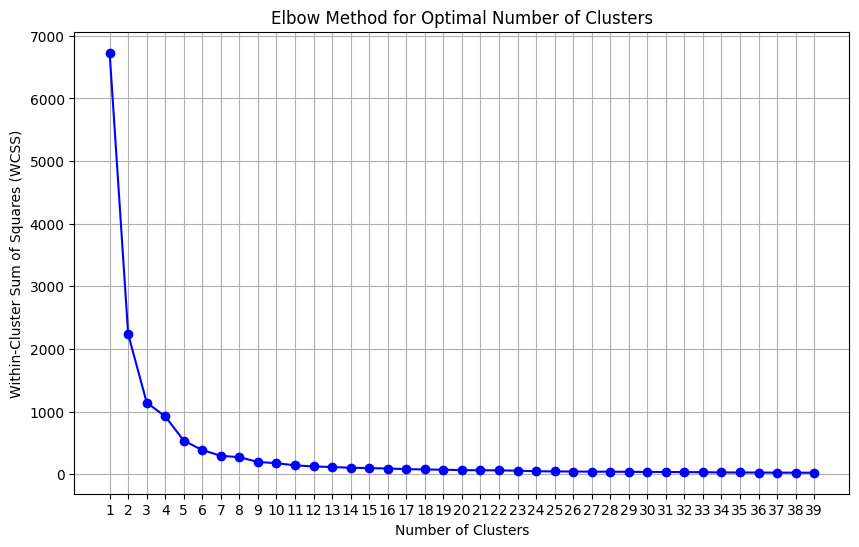

,PULocationID,DOLocationID,distance_km,LocationID_x,PULat,PULon,LocationID_y,DOLat,DOLon
0,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000
1,132,23,32.829474,132,40.646985,-73.786533,23,40.606448,-74.170887
2,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000
3,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000
4,254,117,32.524474,254,40.882157,-73.858948,117,40.594059,-73.789622
...,...,...,...,...,...,...,...,...,...
88565,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000
88566,86,169,30.172856,86,40.602433,-73.755244,169,40.849058,-73.905122
88567,210,18,30.905359,210,40.592023,-73.940507,18,40.867682,-73.890183
88568,142,5,30.139688,142,40.773633,-73.981532,5,40.552659,-74.188484


In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Ensure the coordinates data is prepared
coordinates = stacked_df[['x', 'y']].dropna().values

# Range of clusters to test
cluster_range = range(1, 40)  # Testing from 1 to 30 clusters
wcss = []

# Calculate WCSS for each cluster count
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()
df

In [15]:
from sklearn.cluster import KMeans

# Assuming 'stacked_df' is the DataFrame containing stacked source and destination coordinates
coordinates = stacked_df[['x', 'y']]

# Setup K-Means with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(coordinates)

# Retrieve the cluster centers
centers = kmeans.cluster_centers_


In [16]:
centers

array([[ 40.86741083, -73.84726273],
       [ 40.61580679, -74.08769984],
       [ 40.71522516, -73.75653247],
       [ 40.61596393, -74.16630178],
       [ 40.62250208, -74.00807133],
       [ 40.8457516 , -73.92382456],
       [ 40.76015683, -73.97365206],
       [ 40.64961518, -73.78652808],
       [ 40.52549458, -74.23353355],
       [ 40.69183121, -74.17400027],
       [ 40.74969016, -73.81481319],
       [ 40.58966353, -73.80485276],
       [ 40.53718161, -74.19441883],
       [ 40.58352698, -74.1276305 ],
       [ 40.60243279, -73.7552437 ],
       [ 40.58744296, -73.96700797],
       [ 40.87682878, -73.89669607],
       [ 40.55185417, -74.1508571 ],
       [ 40.69036744, -73.90528955],
       [ 40.77180899, -73.87509539]])

In [18]:
import folium


# Create a map centered around the first coordinate
map_center = [40.69183121, -74.17400027]
m = folium.Map(location=map_center, zoom_start=10)

# Add red circle markers for each coordinate
for coord in centers:
    folium.CircleMarker(
        location=coord,  # Coordinate (latitude, longitude)
        radius=5,        # Radius of the circle
        color='red',     # Border color
        fill=True,       # Fill the circle
        fill_color='red',# Fill color
        fill_opacity=0.8 # Opacity of the fill
    ).add_to(m)

# Save and display the map
m.save("coordinates_map.html")


In [28]:

data = pd.read_csv('input_data/routes.csv')


print("total", len(data))
data.head()

total 49


,Index,Name,Latitude,Longitude
0,1,Alpha,40.822667,-73.887000
1,2,Alpine Tower,40.960667,-73.922667
2,3,Amusement Park,40.966667,-73.673667
3,4,Aqueduct Racetrack,40.672333,-73.829500
4,5,Baisley Pond,40.677833,-73.785667


In [31]:
from folium.plugins import MarkerCluster

# Remove rows with NaN values in latitude or longitude
data_cleaned = data.dropna(subset=['Latitude', 'Longitude'])

# Initialize the map centered around the average location
map_center = [data_cleaned['Latitude'].mean(), data_cleaned['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Use a MarkerCluster to group nearby points
marker_cluster = MarkerCluster().add_to(mymap)

# Add each location as a marker to the map
for _, row in data_cleaned.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
    ).add_to(marker_cluster)

# Save the map to an HTML file
mymap.save("taxi_stations_map.html")



In [35]:
# Function to calculate the closest point
def find_closest(center, points):
    distances = np.sqrt((points['Latitude'] - center[0])**2 + (points['Longitude'] - center[1])**2)
    return points.loc[distances.idxmin()]

# Find the closest points for all centers
closest_points = []
for center in centers:
    closest_point = find_closest(center, data)
    closest_points.append(closest_point)

# Convert the result into a DataFrame
closest_points_df = pd.DataFrame(closest_points)

# Display the results
print(closest_points_df)

    Index                   Name   Latitude  Longitude
12     13             Co-op City  40.877333 -73.828167
46     47                     VZ  40.606833 -74.043833
13     14        Cunningham Park  40.737000 -73.770833
48     49      Willowbrook Expwy  40.612333 -74.153833
46     47                     VZ  40.606833 -74.043833
19     20                    GWB  40.851333 -73.952500
22     23               Intrepid  40.764667 -74.000833
4       5           Baisley Pond  40.677833 -73.785667
16     17   Fresh Kills Landfill  40.576167 -74.207167
43     44        Turnpike Bridge  40.694833 -74.117167
25     26            Kew Gardens  40.709833 -73.830500
31     32  Marine Parkway Bridge  40.573500 -73.884833
16     17   Fresh Kills Landfill  40.576167 -74.207167
48     49      Willowbrook Expwy  40.612333 -74.153833
4       5           Baisley Pond  40.677833 -73.785667
30     31        Manhattan Beach  40.575667 -73.944000
45     46     Van Cortlandt Park  40.891833 -73.895333
48     49 

In [36]:
df_no_duplicates = closest_points_df.drop_duplicates()
df_no_duplicates

,Index,Name,Latitude,Longitude
12,13,Co-op City,40.877333,-73.828167
46,47,VZ,40.606833,-74.043833
13,14,Cunningham Park,40.737000,-73.770833
48,49,Willowbrook Expwy,40.612333,-74.153833
19,20,GWB,40.851333,-73.952500
22,23,Intrepid,40.764667,-74.000833
4,5,Baisley Pond,40.677833,-73.785667
16,17,Fresh Kills Landfill,40.576167,-74.207167
43,44,Turnpike Bridge,40.694833,-74.117167
25,26,Kew Gardens,40.709833,-73.830500


In [43]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

def calculate_distance(row1, row2):
    """Calculate the distance between two points given their latitude and longitude."""
    coords_1 = (row1['Latitude'], row1['Longitude'])
    coords_2 = (row2['Latitude'], row2['Longitude'])
    return geodesic(coords_1, coords_2).kilometers

def calculate_midpoint(row1, row2):
    """Calculate the midpoint between two geographical points."""
    mid_lat = (row1['Latitude'] + row2['Latitude']) / 2
    mid_lon = (row1['Longitude'] + row2['Longitude']) / 2
    return mid_lat, mid_lon

# Sort the dataframe by Index (or any column you prefer)
closest_points_df = closest_points_df.sort_values(by="Index").reset_index(drop=True)

# Track rows to delete and midpoints to add
rows_to_delete = set()
midpoints = []

# Loop through all rows to calculate distances
for i in range(len(closest_points_df)):
    if i in rows_to_delete:  # Skip if the station is already marked to be removed
        continue
    for j in range(i + 1, len(closest_points_df)):
        if j in rows_to_delete:  # Skip if the station is already marked to be removed
            continue
        distance = calculate_distance(closest_points_df.iloc[i], closest_points_df.iloc[j])
        if distance < 5:  # Distance threshold in kilometers
            # Mark both stations for removal
            rows_to_delete.add(i)
            rows_to_delete.add(j)
            # Calculate the midpoint and store it
            mid_lat, mid_lon = calculate_midpoint(closest_points_df.iloc[i], closest_points_df.iloc[j])
            midpoints.append({
                'Index': closest_points_df.iloc[i]['Index'],  # Keep the first station's Index
                'Latitude': mid_lat,
                'Longitude': mid_lon,
                'Name': None,          # Placeholder
            })
            break  # Avoid checking further once a close point is found

# Filter the dataframe to remove rows marked for deletion
filtered_df = closest_points_df.drop(index=list(rows_to_delete))

# Create a DataFrame from midpoints
midpoints_df = pd.DataFrame(midpoints)

# Fill in missing information in the midpoints using the first station of each pair
for index, midpoint in midpoints_df.iterrows():
    # Find the first station index (already preserved in Index)
    first_station = closest_points_df[closest_points_df['Index'] == midpoint['Index']].iloc[0]
    
    # Populate the missing information
    midpoints_df.loc[index, 'Name'] = first_station['Name']

# Combine the updated midpoints with the filtered dataframe
final_df = pd.concat([filtered_df, midpoints_df], ignore_index=True)

# Display the final dataframe
print(final_df)


    Index                   Name   Latitude  Longitude
0       1                  Alpha  40.822667 -73.887000
1      13             Co-op City  40.877333 -73.828167
2      14        Cunningham Park  40.737000 -73.770833
3      20                    GWB  40.851333 -73.952500
4      23               Intrepid  40.764667 -74.000833
5      26            Kew Gardens  40.709833 -73.830500
6      31        Manhattan Beach  40.575667 -73.944000
7      32  Marine Parkway Bridge  40.573500 -73.884833
8      38    Ridgewood Reservoir  40.689000 -73.886500
9      44        Turnpike Bridge  40.694833 -74.117167
10     46     Van Cortlandt Park  40.891833 -73.895333
11     49      Willowbrook Expwy  40.612333 -74.153833
12      5           Baisley Pond  40.677833 -73.785667
13     17   Fresh Kills Landfill  40.576167 -74.207167
14     47                     VZ  40.606833 -74.043833
15     49      Willowbrook Expwy  40.612333 -74.153833


In [44]:
# Initialize a folium map centered around the average location of the stations
map_center = [final_df['Latitude'].mean(), final_df['Longitude'].mean()]

station_map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each station
for index, row in final_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Index: {row['Index']}\nName: {row['Name']}",
        tooltip=f"Index: {row['Index']}",
    ).add_to(station_map)

# Display the map
station_map


In [45]:
import numpy as np
import pandas as pd

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two points on the Earth.
    """
    # Earth radius in kilometers
    R = 6371.0

    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Differences in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

def find_closest_station(lat, lon, station_data):
    """
    Find the closest station to a given latitude and longitude.
    """
    if station_data.empty:
        print("Station data is empty.")
        return None

    # Calculate distances using the haversine function
    distances = station_data.apply(
        lambda row: haversine(lon, lat, row['Longitude'], row['Latitude']),
        axis=1
    )

    # Handle edge cases with NaN distances
    if distances.isna().all():
        print("All distances are NaN for coordinates:", lat, lon)
        return None

    min_idx = distances.idxmin()

    # Handle cases where idxmin produces unexpected results
    if pd.isna(min_idx):
        print("min_idx is NaN after idxmin. Distances:", distances.to_dict())
        return None

    if min_idx not in station_data.index:
        print("min_idx is out of bounds:", min_idx)
        return None

    # Return the station Index for the closest station
    return station_data.loc[min_idx, 'Index']


In [48]:
try:
    df['closest_source_station_Index'] = df.apply(
        lambda row: find_closest_station(row['PULat'], row['PULon'], final_df), axis=1)
    df['closest_dest_station_Index'] = df.apply(
        lambda row: find_closest_station(row['DOLat'], row['DOLon'], final_df), axis=1)
except Exception as e:
    print("An unexpected error occurred:", e)


In [49]:
df.head()

,PULocationID,DOLocationID,distance_km,LocationID_x,PULat,PULon,LocationID_y,DOLat,DOLon,closest_source_station_Index,closest_dest_station_Index
0,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000,5,44
1,132,23,32.829474,132,40.646985,-73.786533,23,40.606448,-74.170887,5,49
2,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000,5,44
3,132,1,33.138263,132,40.646985,-73.786533,1,40.691831,-74.174000,5,44
4,254,117,32.524474,254,40.882157,-73.858948,117,40.594059,-73.789622,13,32


In [51]:
# Group by source and destination station IDs and count occurrences
pair_counts = df.groupby(['closest_source_station_Index', 'closest_dest_station_Index']).size().reset_index(name='count')

# Display the initial result to verify
print(pair_counts.head())


   closest_source_station_Index  closest_dest_station_Index  count
0                             1                           5    145
1                             1                          17   1026
2                             1                          31    818
3                             1                          32     55
4                             1                          44    659


In [52]:
# Sort the counts in descending order
sorted_pair_counts = pair_counts.sort_values(by='count', ascending=False)

# Display the sorted DataFrame
print(sorted_pair_counts)


    closest_source_station_Index  closest_dest_station_Index  count
11                             5                          44  10388
43                            23                          17   5449
14                             5                          49   5128
68                            46                          44   5119
78                            49                           5   4413
..                           ...                         ...    ...
13                             5                          47     20
60                            44                           5     10
63                            44                          46      1
62                            44                          14      1
61                            44                          13      1

[85 rows x 3 columns]


In [54]:
# Filter rows with count greater than 2000
high_count_pairs = sorted_pair_counts[sorted_pair_counts['count'] > 2000]

# Display the filtered DataFrame
print(high_count_pairs)


    closest_source_station_Index  closest_dest_station_Index  count
11                             5                          44  10388
43                            23                          17   5449
14                             5                          49   5128
68                            46                          44   5119
78                            49                           5   4413
32                            17                          23   3232
24                            14                          44   3018
17                            13                          31   2653
48                            31                          13   2496
9                              5                          17   2408
19                            13                          44   2174
51                            31                          46   2136
6                              1                          49   2096
77                            49                

In [55]:
# Assume closest_points_df has columns 'Index', 'Latitude', and 'Longitude'
# Merge latitude and longitude for the source station
high_count_pairs = high_count_pairs.merge(
    final_df[['Index', 'Latitude', 'Longitude']],
    how='left',
    left_on='closest_source_station_Index',
    right_on='Index'
).rename(columns={'Latitude': 'PULat', 'Longitude': 'PULon'}).drop('Index', axis=1)

# Merge latitude and longitude for the destination station
high_count_pairs = high_count_pairs.merge(
    final_df[['Index', 'Latitude', 'Longitude']],
    how='left',
    left_on='closest_dest_station_Index',
    right_on='Index'
).rename(columns={'Latitude': 'DOLat', 'Longitude': 'DOLon'}).drop('Index', axis=1)




In [56]:
high_count_pairs.head()

,closest_source_station_Index,closest_dest_station_Index,count,PULat,PULon,DOLat,DOLon
0,5,44,10388,40.677833,-73.785667,40.694833,-74.117167
1,23,17,5449,40.764667,-74.000833,40.576167,-74.207167
2,5,49,5128,40.677833,-73.785667,40.612333,-74.153833
3,5,49,5128,40.677833,-73.785667,40.612333,-74.153833
4,46,44,5119,40.891833,-73.895333,40.694833,-74.117167


In [57]:
# Save the DataFrame with the top 50 pairs to a CSV file
high_count_pairs.to_csv('output_data/top_50_station_pairs.csv', index=False)
